In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import os
import json
import pandas as pd

In [2]:
def path_leaf(path): # get filename(with extension) from path
    head, tail = os.path.split(path)
    return tail or os.path.basename(head)


def file_in_folder(folder_path, flag=1): # get files in given folder, return list of filepath and filename
    file_list = []
    file_name = []
    for(dirpath, dirnames, filenames) in os.walk(folder_path):
#         print(filenames)
        
        for i in filenames:
            try:
                file_list += [dirpath + os.sep + i]
                file_name += [i]
            except:
                continue
        if flag == 0:
            break
        file_list.sort(key=path_leaf)
        file_name.sort()
    return [file_list, file_name]


def get_folders_list(old_datas_dir):
    old_datas_dir_list = [os.path.join(old_datas_dir, name) for name in os.listdir(old_datas_dir) if os.path.isdir(old_datas_dir) if os.path.isdir(os.path.join(old_datas_dir, name))]
    old_datas_dir_name = [name for name in os.listdir(old_datas_dir) if os.path.isdir(old_datas_dir) if os.path.isdir(os.path.join(old_datas_dir, name))]
    old_datas_dir_list.sort(key=path_leaf)
    old_datas_dir_name.sort()
    return old_datas_dir_list


def create_folder(new_folder, flag=1):
    try:
        os.mkdir(new_folder)
    except:
        if flag:
            pass
        else:
            shutil.rmtree(new_folder)
            os.mkdir(new_folder)


In [3]:
def get_time(start_time, end_time):
    # count time in minutes
    start_split = start_time.split()
    end_split = end_time.split()
    
    day_diff = int(end_split[2]) - int(start_split[2])
    hour_diff = int(end_split[3][:2]) - int(start_split[3][:2])
    minute_diff = int(end_split[3][3:5]) - int(start_split[3][3:5])
    second_diff = int(end_split[3][6:]) - int(start_split[3][6:])
    
    t = day_diff*24*60 + hour_diff*60 + minute_diff + second_diff/60
    return t

In [4]:
caller_list = ['freebayes', 'gatk3', 'gatk4', 'platypus', 'strelka']
chr_list = ['chr{:02}'.format(i) for i in range(4, 23)]
time_folder = 'timing-all'
SNP_file = 'SNP.csv'
InDel_file = 'InDel.csv'

In [5]:
time_folders = get_folders_list(time_folder)
# time_files = [file_in_folder(get_folders_list(i)[0])[0] for i in time_folders]
# print(time_files)
num_caller_time_dict = {}
for time_chr in time_folders:
    name = path_leaf(time_chr)
    name = name[:name.find('t')]
    if len(name) == 4:
        name = name[:3] + '0' + name[3:]
    
    caller_time_dict = {}
    time_files = file_in_folder(get_folders_list(time_chr)[0])[0]

    for caller in caller_list:
        tmp = [i for i in time_files if i.find(caller)!=-1]

        if len(tmp) != 0:
            with open(tmp[0], 'r') as f:
                end_time = f.readline()
            with open(tmp[1], 'r') as f:
                start_time = f.readline()

            duration = get_time(start_time, end_time)
        else:
            duration = -1
        
        caller_time_dict[caller] = duration
    
    num_caller_time_dict[name] = caller_time_dict
print(num_caller_time_dict)

{'chr10': {'freebayes': 299.25, 'gatk3': 143.3, 'gatk4': 920.8333333333334, 'platypus': 75.91666666666667, 'strelka': 121.23333333333333}, 'chr11': {'freebayes': 289.7, 'gatk3': 137.2, 'gatk4': 840.9666666666667, 'platypus': 46.333333333333336, 'strelka': 103.75}, 'chr12': {'freebayes': 301.05, 'gatk3': 138.71666666666667, 'gatk4': 888.7333333333333, 'platypus': 50.2, 'strelka': 113.46666666666667}, 'chr13': {'freebayes': 235.41666666666666, 'gatk3': 125.51666666666667, 'gatk4': 766.4666666666667, 'platypus': 49.71666666666667, 'strelka': 109.98333333333333}, 'chr15': {'freebayes': 182.08333333333334, 'gatk3': 92.28333333333333, 'gatk4': 544.3333333333334, 'platypus': 30.816666666666666, 'strelka': 115.46666666666667}, 'chr16': {'freebayes': 211.08333333333334, 'gatk3': 88.78333333333333, 'gatk4': 579.8666666666667, 'platypus': 91.35, 'strelka': 95.2}, 'chr17': {'freebayes': 196.41666666666666, 'gatk3': 85.9, 'gatk4': 516.9333333333333, 'platypus': 94.18333333333334, 'strelka': 103.45}

In [6]:
SNPs = pd.read_csv(SNP_file)
InDels = pd.read_csv(InDel_file)

for i in range(len(caller_list)):
    SNPs.rename(index={i: caller_list[i]}, inplace=True)
SNPs = SNPs.iloc[:, 1:]
SNPs.columns = chr_list
print(SNPs)

for i in range(len(caller_list)):
    InDels.rename(index={i: caller_list[i]}, inplace=True)
InDels = InDels.iloc[:, 1:]
InDels.columns = chr_list
print(InDels)

              chr04     chr05     chr06     chr07     chr08     chr09  \
freebayes  0.999456  0.999329  0.999348  0.998860  0.999375  0.999339   
gatk3      0.999499  0.999615  0.999616  0.999447  0.999570  0.999627   
gatk4      0.999501  0.999606  0.999604  0.999435  0.999560  0.999596   
platypus   0.992390  0.992595  0.991720  0.991984  0.992703  0.992302   
strelka    0.999361  0.999484  0.999224  0.999323  0.999468  0.999553   

              chr10     chr11     chr12     chr13     chr14     chr15  \
freebayes  0.999235  0.998911  0.999318  0.999391  0.999009  0.999306   
gatk3      0.999597  0.999317  0.999474  0.999509  0.999396  0.999432   
gatk4      0.999591  0.999266  0.999470  0.999496  0.999406  0.999443   
platypus   0.992013  0.992077  0.991563  0.992240  0.991666  0.992447   
strelka    0.999425  0.999082  0.999473  0.999114  0.999012  0.999512   

              chr16     chr17     chr18     chr19     chr20     chr21  \
freebayes  0.999059  0.999026  0.999241  0.997662

# For some chromosome, the time and accuracy trade-off for callers

C:\Users\WuChaofeng\AppData\Roaming\Python\Python36\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


chr06 is failed
chr14 is failed


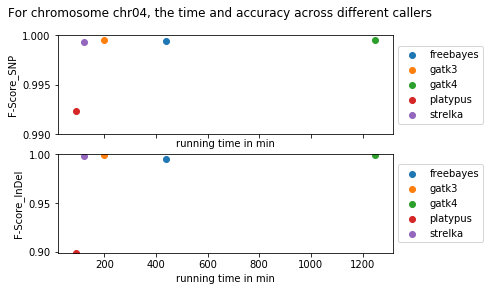

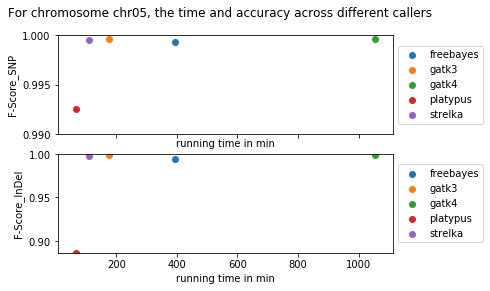

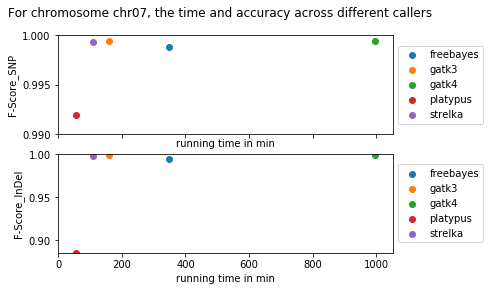

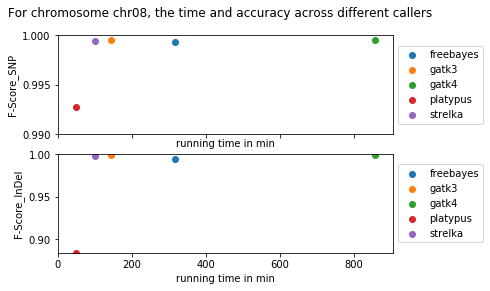

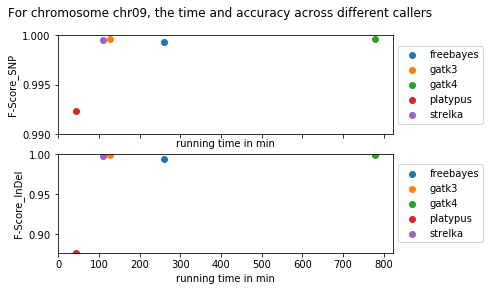

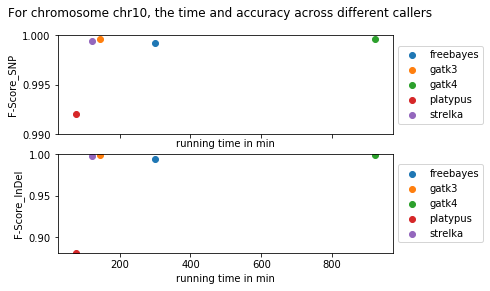

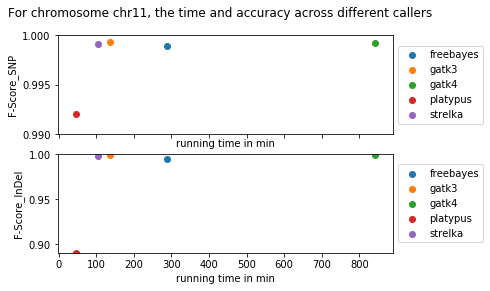

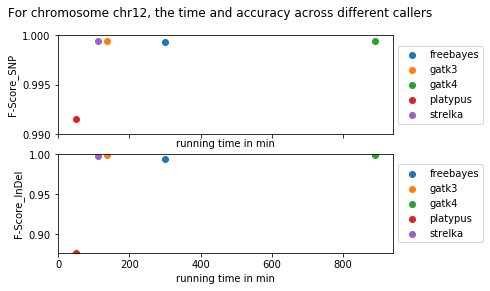

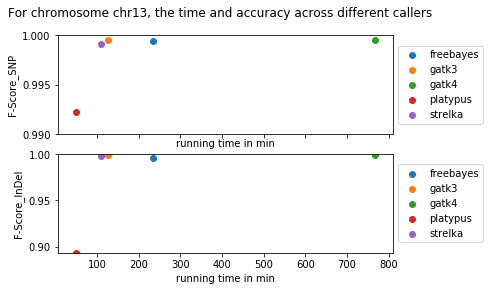

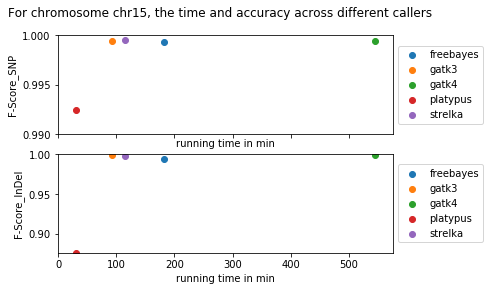

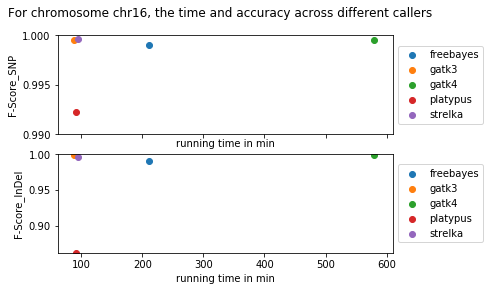

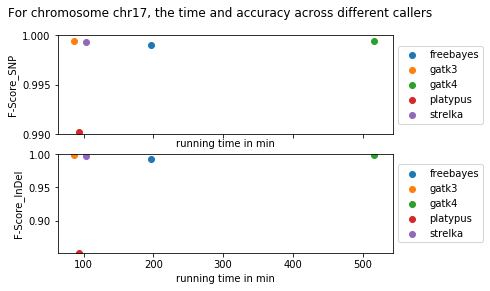

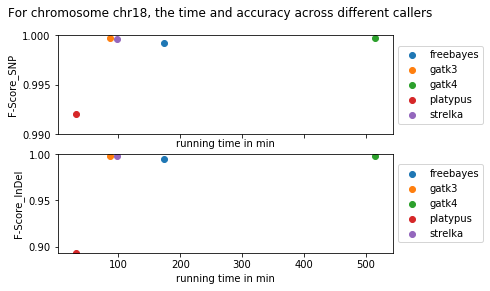

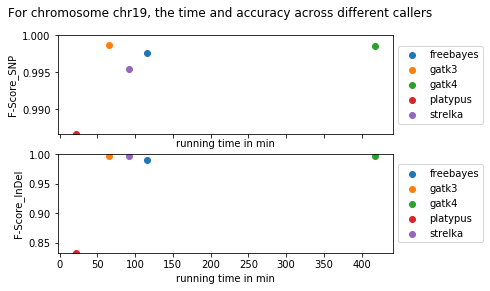

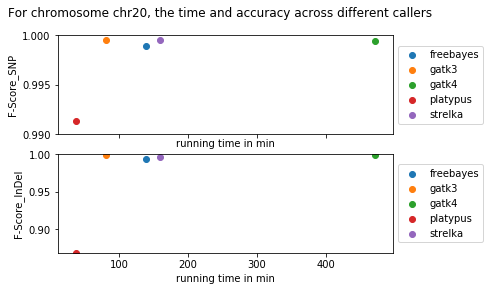

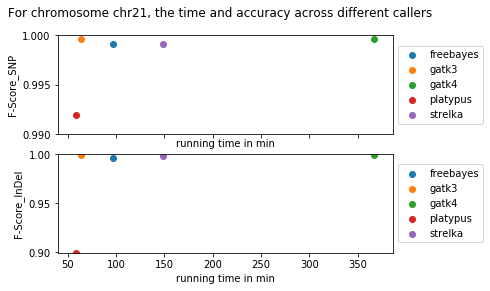

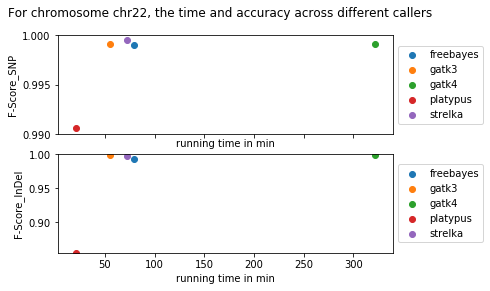

In [15]:
for chr_name in chr_list:
#     chr_name = chr_list[0]
    try:
        chr_time = list(num_caller_time_dict[chr_name].values())
        chr_snp = SNPs.loc[:, chr_name].values
        chr_indel = InDels.loc[:, chr_name].values
        time_snp = list(zip(chr_time, chr_snp))
        time_indel = list(zip(chr_time, chr_indel))
#         print(time_snp)
        f, axarr = plt.subplots(2, sharex=True)
        f.suptitle('For chromosome {}, the time and accuracy across different callers'.format(chr_name))
        axarr[0].set_xlabel('running time in min')
        axarr[0].set_ylabel('F-Score')
        for i in range(len(caller_list)):
            axarr[0].scatter(chr_time[i], chr_snp[i], label=caller_list[i])
            axarr[1].scatter(chr_time[i], chr_indel[i], label=caller_list[i])
        axarr[0].set_xlabel('running time in min')
        axarr[0].set_ylabel('F-Score_SNP')
        axarr[1].set_xlabel('running time in min')
        axarr[1].set_ylabel('F-Score_InDel')
        axarr[0].set_ylim([min(0.99, min(chr_snp)), 1.0])
        axarr[1].set_ylim([min(0.99, min(chr_indel)), 1.0])
        axarr[0].legend(loc='center left', bbox_to_anchor=(1, 0.5))
        axarr[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))
        f.show()
    except:
        print('{} is failed'.format(chr_name))

# For some caller, the time and accuracy trade-off for chromosomes

C:\Users\WuChaofeng\AppData\Roaming\Python\Python36\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


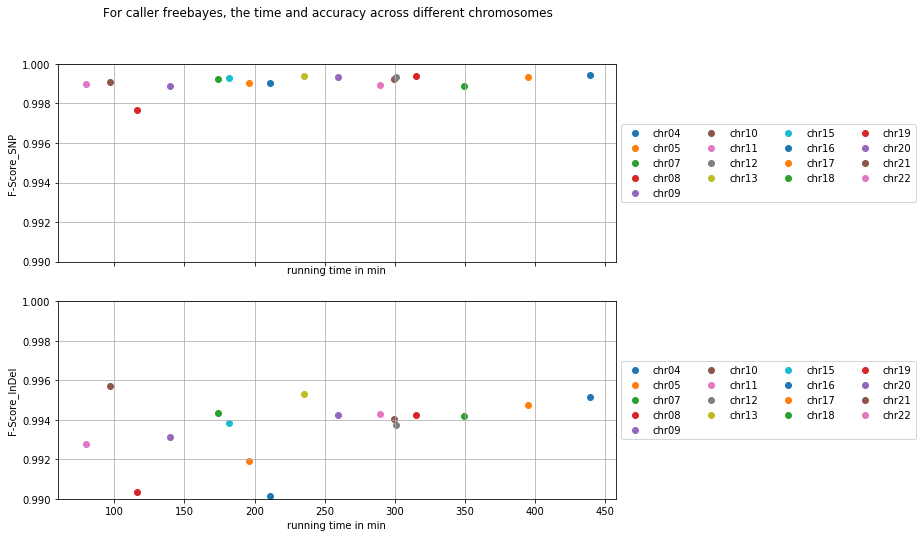

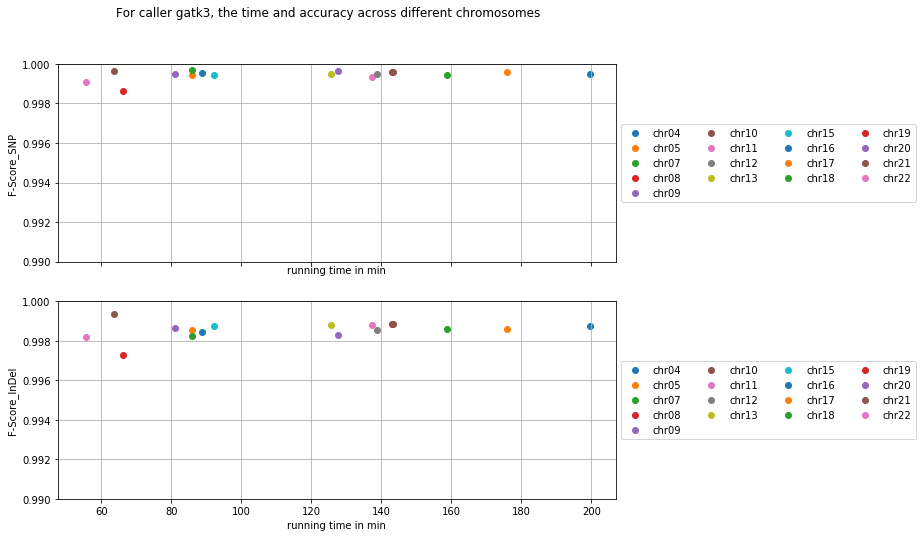

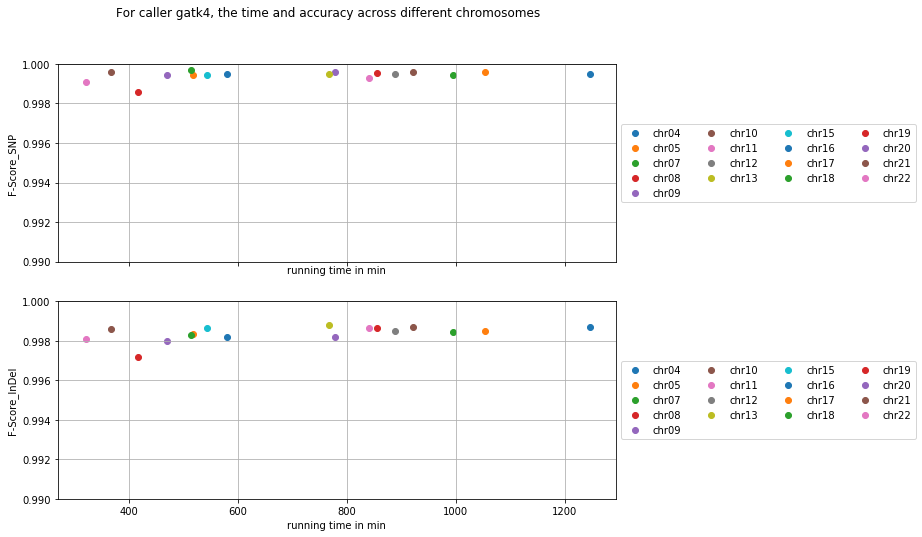

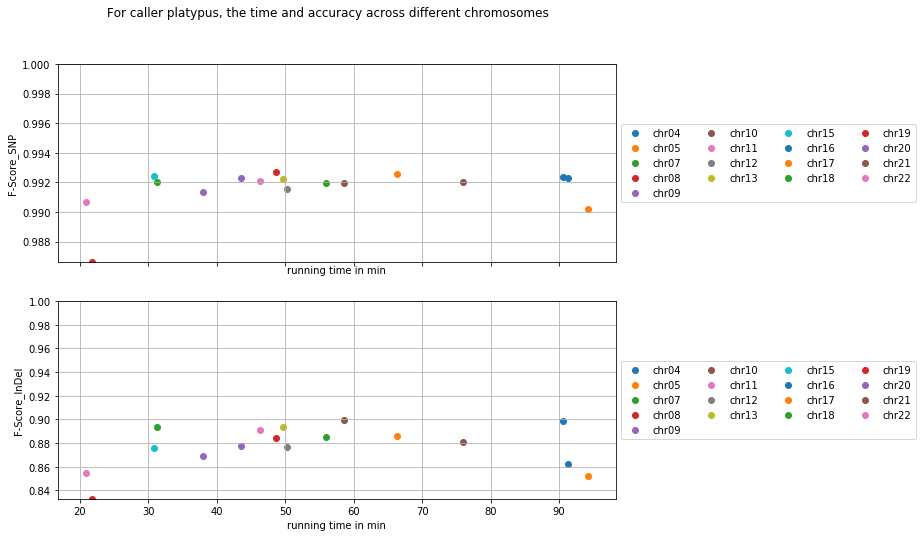

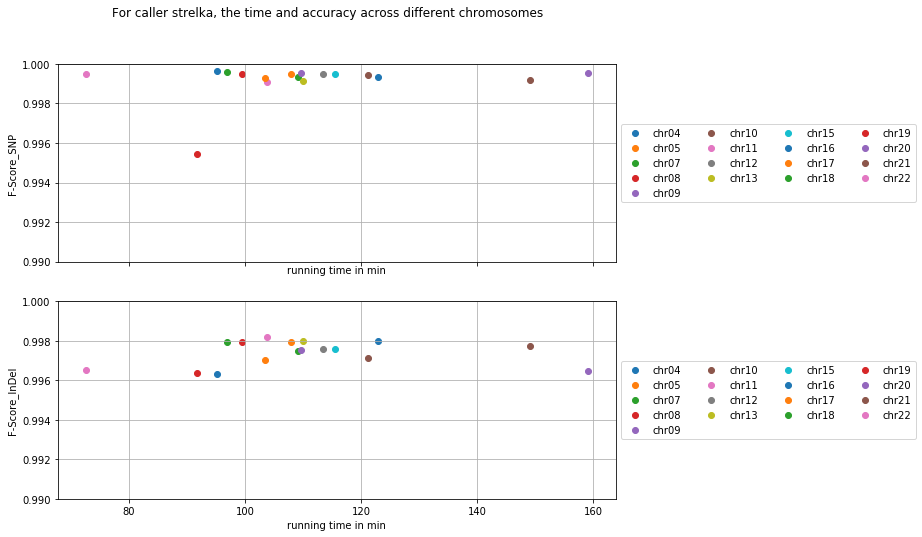

In [16]:
for caller in caller_list:
#     caller = caller_list[0]
    caller_time = []
    include = []
    for i in chr_list:
        if i in num_caller_time_dict.keys():
            caller_time.append(num_caller_time_dict[i][caller])
            include.append(i)
        else:
            pass

    # caller_time = [num_caller_time_dict[i][caller] for i in chr_list]
    caller_snp = SNPs.loc[caller, include].values
    caller_indel = InDels.loc[caller, include].values
#     print(caller_time)
#     print(caller_snp)
#     print(caller_indel)
    f, axarr = plt.subplots(2, sharex=True, figsize=(10,8))
    f.suptitle('For caller {}, the time and accuracy across different chromosomes'.format(caller))
    for i in range(len(include)):
        axarr[0].scatter(caller_time[i], caller_snp[i], label=include[i])
        axarr[1].scatter(caller_time[i], caller_indel[i], label=include[i])
    axarr[0].set_xlabel('running time in min')
    axarr[0].set_ylabel('F-Score_SNP')
    axarr[1].set_xlabel('running time in min')
    axarr[1].set_ylabel('F-Score_InDel')
    axarr[0].legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=4)
    axarr[1].legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=4)
    axarr[0].grid()
    axarr[1].grid()
    axarr[0].set_ylim([min(0.99, min(caller_snp)), 1.0])
    axarr[1].set_ylim([min(0.99, min(caller_indel)), 1.0])
    f.show()

Findings:
1. Caller seems have stable accuracy across different inputs
2. Accuracy seems have little difference across different callers
3. Running time varies across different input data, and the orders of running time are same when using different callers
4. Running time 

TODO:
1. given input size, try to build a model to predict running time, under current configuration.
2. may need to try more callers

Questions:
1. why caller has different accuracy across different inputs
2. is the caller determinant. i.e. same input will always give same output
3. given an accuracy and inputs, choose caller and configuration so that the cost(configuration, time) is minimized.